### Pertanyaan Bisnis

1. Bagaimana proporsi pelanggan baru dan pelanggan kembali di setiap bulan?
2. Produk apa yang paling populer di setiap tipe toko dan kanal distribusi?
3. Apakah terdapat perbedaan nilai rata-rata order yang dilakukan di tiap kanan
4. Kota mana yang bisa dijadikan target utama pemasaran dengan tingkat transaksi yang tinggi dan yang dapat menghasilkan pelanggan baru?
5. Bagaimana tren transaksi bulanan, dan apakah ada pola musiman tertentu?
6. Apakah pelanggan di E-Commerce ini mmenggunakan beberapa channel untuk membeli barang atau hanya nyaman di satu channel saja?
7. Bagaimana perilaku pelanggan berbeda berdasarkan segmentasi RFM (Recency, Frequency, Monetary)?
8. Segmentasi pelanggan mana yang sebaiknya menjadi target promosi untuk meningkatkan retensi dan penjualan?
9. Bagaimana perilaku customer dalam studi kasus E-Commerce ini
10. Bagaimana informasi tentang preferensi produk, transaksi, dan kanal distribusi dapat digunakan untuk mengoptimalkan strategi pemasaran?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from google.colab import drive

In [ ]:
transaction_df = pd.read_csv(
    "https://drive.google.com/uc?id=166cBCZwEHj_62hzmOMosZVvK6w3djUQ0"
)
transaction_df.head(2)

,id,store_id,customer_id,product_id,quantity,total,created_at
0,626490,1,421833,50,1,884,2018-11-30 18:49:07.000
1,111599,2,125389,49,40,32720,2018-05-25 06:35:06.000


In [ ]:
customer_df = pd.read_csv(
    "https://drive.google.com/uc?id=1Wqm2T9MUVrVsUiCCW3LUK6Tr7ZSWgf8u"
)
customer_df.head(2)

,id,city,email,gender
0,387804,Jakarta,Gmail,Male
1,353918,Jakarta,Gmail,Male


In [ ]:
store_df = pd.read_csv(
    "https://drive.google.com/uc?id=1OtuBk8i-YJJysUk9qW-OHLT0cdshEAZJ"
)
store_df.head(2)

,id,type
0,1,Ofline store
1,2,Online store


In [ ]:
product_df = pd.read_csv(
    "https://drive.google.com/uc?id=1GAbm-QPGimwMgRw8k_h_-mnzxPXM20gR"
)
product_df.head(2)

,id,price
0,14,2427
1,15,2274


In [ ]:
import pandas as pd

transaction_store_df = pd.merge(
    transaction_df,
    store_df[['id', 'type']],
    left_on='store_id',
    right_on='id',
    how='inner',
    suffixes=('', '_store')
)

transaction_store_product_df = pd.merge(
    transaction_store_df,
    product_df[['id', 'price']],
    left_on='product_id',
    right_on='id',
    how='inner',
    suffixes=('', '_product')
)

all_df = pd.merge(
    transaction_store_product_df,
    customer_df[['id', 'city', 'email', 'gender']],
    left_on='customer_id',
    right_on='id',
    how='inner',
    suffixes=('', '_customer')
)
all_df = all_df[[
    'id',
    'created_at',
    'store_id',
    'type',
    'customer_id',
    'city',
    'email',
    'gender',
    'product_id',
    'price',
    'quantity',
    'total'
]]

all_df = all_df.rename(columns={
    'id': 'transaction_id',
    'type': 'store_type',
    'city': 'customer_city'
})
print("Ukuran final dataset:", all_df.shape)
all_df.head()


Ukuran final dataset: (181387, 12)


,transaction_id,created_at,store_id,store_type,customer_id,customer_city,email,gender,product_id,price,quantity,total
0,626490,2018-11-30 18:49:07.000,1,Ofline store,421833,Depok,Hotmail,Female,50,884,1,884
1,111599,2018-05-25 06:35:06.000,2,Online store,125389,Depok,Gmail,Female,49,818,40,32720
2,383397,2018-10-16 11:08:36.000,2,Online store,192320,Depok,Gmail,Female,38,1811,87,157557
3,371545,2018-10-11 11:47:29.000,1,Ofline store,337829,Depok,Gmail,Male,38,1811,38,68818
4,351387,2018-10-03 01:34:23.000,2,Online store,267599,Depok,Gmail,Female,39,1888,93,175584


## Assesing Data

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   transaction_id  181387 non-null  int64 
 1   created_at      181387 non-null  object
 2   store_id        181387 non-null  int64 
 3   store_type      181387 non-null  object
 4   customer_id     181387 non-null  int64 
 5   customer_city   181387 non-null  object
 6   email           181387 non-null  object
 7   gender          181387 non-null  object
 8   product_id      181387 non-null  int64 
 9   price           181387 non-null  int64 
 10  quantity        181387 non-null  int64 
 11  total           181387 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 16.6+ MB


Created_at masih berbentuk objek seharusnya date

In [ ]:
all_df.duplicated().sum()

np.int64(0)

In [ ]:
all_df.describe()

,transaction_id,store_id,customer_id,product_id,price,quantity,total
count,181387.000000,181387.000000,181387.000000,181387.000000,181387.000000,181387.000000,181387.000000
mean,469900.800140,1.858810,299004.837883,48.066818,1442.248381,50.526168,72835.999537
std,198755.702143,0.460508,103317.784062,10.383474,569.530822,28.850826,53147.171797
min,90530.000000,1.000000,70.000000,14.000000,336.000000,1.000000,354.000000
25%,333032.500000,2.000000,226131.000000,39.000000,884.000000,26.000000,30208.000000
50%,480991.000000,2.000000,325403.000000,49.000000,1677.000000,51.000000,60996.000000
75%,639105.000000,2.000000,387582.000000,51.000000,1888.000000,75.000000,107316.000000
max,783553.000000,4.000000,441319.000000,97.000000,2439.000000,100.000000,243900.000000


## Cleaning Data

In [ ]:
datetime_column = ['created_at']
for column in datetime_column:
  all_df[column] = pd.to_datetime(all_df[column])


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  181387 non-null  int64         
 1   created_at      181387 non-null  datetime64[ns]
 2   store_id        181387 non-null  int64         
 3   store_type      181387 non-null  object        
 4   customer_id     181387 non-null  int64         
 5   customer_city   181387 non-null  object        
 6   email           181387 non-null  object        
 7   gender          181387 non-null  object        
 8   product_id      181387 non-null  int64         
 9   price           181387 non-null  int64         
 10  quantity        181387 non-null  int64         
 11  total           181387 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 16.6+ MB


## Pertanyaan 1

In [ ]:
import pandas as pd

all_df['month'] = pd.to_datetime(all_df['created_at']).dt.month
monthly_customers = all_df[['month', 'customer_id']].drop_duplicates()
first_purchase = (
    monthly_customers
    .groupby('customer_id')['month']
    .min()
    .reset_index()
    .rename(columns={'month': 'first_month'})
)

customer_classification = (
    monthly_customers
    .merge(first_purchase, on='customer_id', how='left')
)

customer_classification['customer_type'] = customer_classification.apply(
    lambda x: 'new_customers' if x['month'] == x['first_month'] else 'returning_customers',
    axis=1
)

result = (
    customer_classification
    .groupby('month')
    .agg(
        new_customers=('customer_type', lambda x: (x == 'new_customers').sum()),
        returning_customers=('customer_type', lambda x: (x == 'returning_customers').sum()),
        total_customers=('customer_id', 'count')
    )
    .reset_index()
    .sort_values('month')
)

print(result)


   month  new_customers  returning_customers  total_customers
0      5           4209                    0             4209
1      6           3387                 1620             5007
2      7            934                 1095             2029
3      8            577                 1055             1632
4      9           4433                 2755             7188
5     10           6647                 5345            11992
6     11          10129                 7657            17786
7     12           6923                10896            17819


Berdasarkan data, jumlah pelanggan baru mengalami fluktuasi, dimulai dari 4.209 di bulan Mei dan mencapai puncaknya di November dengan 10.129 pelanggan baru, menunjukkan adanya pertumbuhan akuisisi pelanggan yang signifikan, kemungkinan dipengaruhi oleh promosi atau musim belanja. Sementara itu, pelanggan yang kembali (returning customers) juga meningkat, terutama pada bulan November dan Desember, dengan jumlah masing-masing 7.657 dan 10.896 pelanggan, menandakan semakin banyak pelanggan yang melakukan pembelian ulang. Tren ini menunjukkan strategi retensi mulai berhasil, namun masih terdapat kesenjangan antara pelanggan baru dan pelanggan yang kembali, sehingga penting untuk meningkatkan program loyalitas agar lebih banyak pelanggan baru berubah menjadi pelanggan setia.

## Pertanyaan 2

In [ ]:
product_revenue = (
    all_df.groupby(['store_type', 'product_id'])['total']
    .sum()
    .reset_index()
    .rename(columns={'total': 'total_revenue'})
)
top_products_revenue_per_channel = (
    product_revenue.sort_values(['store_type', 'total_revenue'], ascending=[True, False])
    .groupby('store_type')
    .head(10)
    .reset_index(drop=True)
)

top_products_revenue_per_channel

,store_type,product_id,total_revenue
0,Event,38,33340510
1,Event,39,25189696
2,Event,49,14099048
3,Event,50,11851788
4,Event,58,9678460
5,Event,59,6656013
6,Event,76,6125973
7,Event,52,5269153
8,Event,86,5161308
9,Event,40,4970658


Dari data top 10 produk berdasarkan total revenue di setiap kanal distribusi, terlihat bahwa kanal Online Store mendominasi dengan nilai penjualan yang jauh lebih tinggi dibandingkan kanal lainnya. Produk dengan ID 39 dan 38 menjadi kontributor terbesar dengan total revenue masing-masing lebih dari Rp2 miliar, menunjukkan tingginya permintaan pada produk ini secara online. Pada Offline Store, produk yang sama juga memimpin namun dengan selisih revenue yang cukup besar dibandingkan penjualan online, menandakan pergeseran perilaku konsumen ke kanal digital. Kanal Event dan Partnership memiliki kontribusi yang lebih kecil, kemungkinan karena bersifat musiman atau lebih fokus pada strategi pemasaran tertentu. Insight ini menunjukkan pentingnya memprioritaskan ketersediaan stok dan promosi pada produk unggulan, terutama di kanal online, sambil mengoptimalkan kanal lain untuk meningkatkan persebaran penjualan.

## Pertanyaan 3

In [ ]:
average_order_value_per_channel = (
    all_df.groupby('store_type')['total'].mean().reset_index()
)

average_order_value_per_channel

,store_type,total
0,Event,72010.615420
1,Ofline store,71178.244092
2,Online store,73249.335522
3,Partnership,69497.107485


Dari data average order total di setiap kanal distribusi, terlihat bahwa Online Store memiliki nilai rata-rata pesanan tertinggi sebesar Rp73.249, menunjukkan bahwa pelanggan yang berbelanja secara online cenderung melakukan pembelian dengan nilai yang lebih besar per transaksi. Kanal Event dan Offline Store memiliki nilai rata-rata yang sedikit lebih rendah, yaitu sekitar Rp72.010 dan Rp71.178, yang menunjukkan perilaku pembelian yang relatif stabil. Sementara itu, Partnership memiliki rata-rata pesanan terendah, yaitu Rp69.497, yang bisa disebabkan oleh sifat kerja sama yang mungkin lebih berfokus pada volume penjualan daripada nilai per transaksi. Insight ini menunjukkan bahwa kanal online memiliki potensi besar untuk mendorong revenue melalui strategi upselling dan cross-selling, sementara kanal lain dapat dioptimalkan dengan strategi promosi yang mendorong peningkatan nilai pembelian per transaksi.

## Pertanyaan 4

In [ ]:
all_df.groupby(by=["customer_city", "store_type"]).agg({
    "transaction_id" : "count",
     'customer_id': 'nunique'
})

transaction_id  customer_id
customer_city store_type                               
Bogor         Event                    400          267
              Ofline store            6258          981
              Online store           28706         6342
              Partnership              329          129
Depok         Event                    896          501
              Ofline store           12777         2031
              Online store           58853        12906
              Partnership              740          302
Jakarta       Event                    410          256
              Ofline store            6379          969
              Online store           28926         6414
              Partnership              361          136
Tangerang     Event                    447          271
              Ofline store            6279          961
              Online store           29279         6363
              Partnership              347          118

Online Store menjadi kanal penjualan utama di semua kota dengan jumlah transaksi dan customer unik tertinggi, terutama di Depok yang mencatat 58.853 transaksi dari 12.906 customer. Offline Store berada di posisi kedua, sementara Event dan Partnership memiliki kontribusi yang relatif kecil. Hal ini menunjukkan perilaku pelanggan yang semakin bergeser ke kanal online, sehingga strategi pemasaran sebaiknya difokuskan pada optimalisasi penjualan online, tanpa mengabaikan potensi pertumbuhan dari kanal offline dan event.

## Pertanyaan 5

In [ ]:
all_df['month'] = all_df['created_at'].dt.month

In [ ]:
result = (
    all_df.groupby(['month', 'store_type'])['transaction_id']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)
result

,month,store_type,transaction_id
0,11,Online store,43013
1,12,Online store,42032
2,10,Online store,30022
3,9,Online store,12966
4,6,Online store,8679
5,5,Online store,8565
6,12,Ofline store,6303
7,11,Ofline store,5602
8,9,Ofline store,5070
9,10,Ofline store,4153


Dari data ini terlihat bahwa Online Store mendominasi jumlah transaksi setiap bulannya, dengan puncak tertinggi terjadi pada bulan November (43.013 transaksi) dan Desember (42.032 transaksi). Offline Store berada di posisi kedua dengan tren yang stabil, sementara Event dan Partnership hanya memberikan kontribusi yang relatif kecil. Pola ini menunjukkan adanya peningkatan signifikan menjelang akhir tahun, yang kemungkinan dipengaruhi oleh momen belanja seperti promosi akhir tahun, sehingga strategi pemasaran dapat difokuskan untuk memperkuat kanal online dan memaksimalkan penjualan selama periode puncak tersebut.

## Pertanyaan 6

In [ ]:
customer_channel_count = (
    all_df.groupby('customer_id')['store_type']
    .nunique()
    .reset_index()
    .rename(columns={'store_type': 'channel_count'})
)

customer_channel_count['channel_category'] = customer_channel_count['channel_count'].apply(
    lambda x: 'Single Channel' if x == 1 else 'Multiple Channels'
)

result = (
    customer_channel_count.groupby('channel_category')['customer_id']
    .nunique()
    .reset_index()
    .rename(columns={'customer_id': 'total_customers'})
)

result

,channel_category,total_customers
0,Multiple Channels,1561
1,Single Channel,35678


Mayoritas pelanggan (35.678 pelanggan) hanya bertransaksi melalui satu kanal (Single Channel), sementara 1.561 pelanggan menggunakan beberapa kanal (Multiple Channels). Hal ini menunjukkan bahwa sebagian besar pelanggan cenderung loyal pada satu jenis kanal, sehingga strategi pemasaran dapat difokuskan pada peningkatan pengalaman di kanal utama mereka. Namun, mendorong lebih banyak pelanggan untuk menggunakan berbagai kanal juga berpotensi meningkatkan retensi dan nilai transaksi jangka panjang.

## Pertanyaan 7 & 8

RFM ANALYSIS

In [ ]:
all_df.columns

Index(['transaction_id', 'created_at', 'store_id', 'store_type', 'customer_id',
       'customer_city', 'email', 'gender', 'product_id', 'price', 'quantity',
       'total', 'month'],
      dtype='object')

In [ ]:
rfm_df = all_df.groupby('customer_id', as_index=False).agg({
    'created_at': 'max',
    'transaction_id': 'nunique',
    'total': 'sum'
})

rfm_df.rename(columns={
    'created_at': 'max_order_date',
    'transaction_id': 'frequency',
    'total': 'monetary'
}, inplace=True)

recent_date = all_df['created_at'].max()
rfm_df['recency'] = (recent_date - rfm_df['max_order_date']).dt.days

rfm_df.drop(columns=['max_order_date'], inplace=True)

print(rfm_df.head())


   customer_id  frequency  monetary  recency
0           70          5    281996       33
1          164         11    507978       11
2          233          1      9724       59
3          273          4    188512       95
4          596         10    473224       17


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['recency', 'frequency', 'monetary']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm_df[features])


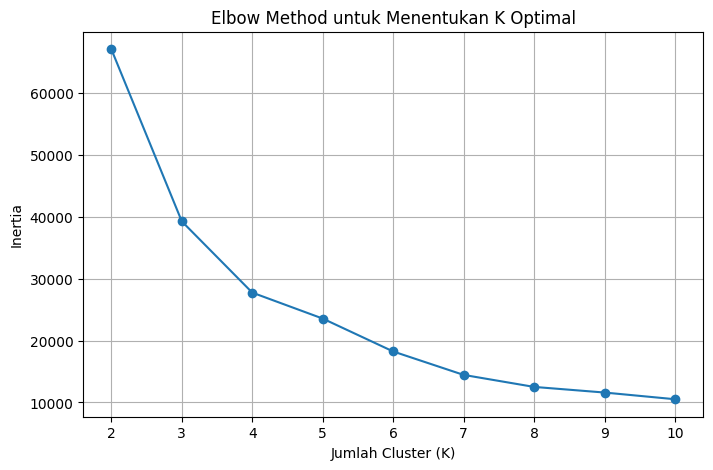

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xticks(K_range)
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(scaled_features)

rfm_df.head()


,customer_id,frequency,monetary,recency,cluster
0,70,5,281996,33,0
1,164,11,507978,11,0
2,233,1,9724,59,0
3,273,4,188512,95,0
4,596,10,473224,17,0


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_features, rfm_df['cluster'])
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.5836


In [ ]:
cluster_summary = (
    rfm_df.groupby('cluster')
    .agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': 'mean',
        'customer_id': 'count'
    })
    .rename(columns={'customer_id': 'total_customers'})
    .reset_index()
)

print(cluster_summary)


   cluster     recency  frequency      monetary  total_customers
0        0   37.903845   3.204777  2.234807e+05            27591
1        1  199.943307   2.652552  1.890688e+05             4251
2        2   26.973319  15.135816  1.156516e+06             5397


In [ ]:
all_with_cluster = all_df.merge(
    rfm_df[['customer_id', 'cluster']],
    on='customer_id',
    how='left'
)


In [ ]:
print(all_with_cluster['cluster'].isna().sum())


0


Berdasarkan hasil clustering, terdapat tiga segmen pelanggan utama. Cluster 2 berisi pelanggan paling bernilai dengan frekuensi transaksi tinggi (15,13) dan monetary rata-rata tertinggi (±1,15 juta), meskipun jumlahnya hanya 5.397 pelanggan, sehingga mereka merupakan prioritas utama untuk program loyalitas. Cluster 0 memiliki jumlah pelanggan terbanyak (27.591) dengan frekuensi sedang dan monetary relatif rendah, yang menunjukkan potensi untuk ditingkatkan melalui promosi dan upselling. Sementara itu, Cluster 1 memiliki pelanggan dengan aktivitas rendah (recency tinggi ±200 hari dan frekuensi rendah), sehingga perlu pendekatan retargeting atau reaktivasi agar mereka kembali bertransaksi.

## Pertanyaan 9

In [ ]:
last_date = all_with_cluster['created_at'].max()

customer_features = all_with_cluster.groupby('customer_id').agg({
    'transaction_id': 'nunique',
    'total': 'sum',
    'price': 'mean',
    'quantity': 'mean',
    'created_at': 'max'
}).reset_index()

customer_features.rename(columns={
    'transaction_id': 'transaction_count',
    'total': 'total_spent',
    'price': 'avg_order_value',
    'quantity': 'avg_quantity',
    'created_at': 'last_purchase_date'
}, inplace=True)

customer_features['days_since_last_purchase'] = (
    last_date - customer_features['last_purchase_date']
).dt.days

customer_features.drop(columns=['last_purchase_date'], inplace=True)

customer_features.head()

,customer_id,transaction_count,total_spent,avg_order_value,avg_quantity,days_since_last_purchase
0,70,5,281996,884.0,63.800000,33
1,164,11,507978,818.0,56.454545,11
2,233,1,9724,884.0,11.000000,59
3,273,4,188512,781.0,62.750000,95
4,596,10,473224,951.4,55.500000,17


In [ ]:
from sklearn.preprocessing import StandardScaler

behavior_columns = [
    'transaction_count', 'total_spent',
    'avg_order_value', 'avg_quantity',
    'days_since_last_purchase'
]

scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_features[behavior_columns])

customer_scaled_df = pd.DataFrame(customer_scaled, columns=behavior_columns)
customer_scaled_df.head()


,transaction_count,total_spent,avg_order_value,avg_quantity,days_since_last_purchase
0,0.023239,-0.167659,-1.166089,0.667665,-0.370708
1,1.103209,0.352922,-1.302162,0.299257,-0.744522
2,-0.696740,-0.794874,-1.166089,-1.980499,0.071072
3,-0.156755,-0.383012,-1.378446,0.615003,0.682767
4,0.923214,0.272861,-1.027129,0.251382,-0.642573


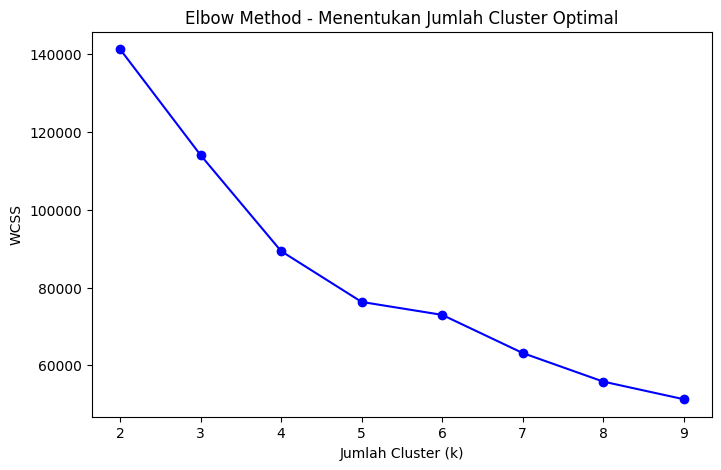

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Menentukan Jumlah Cluster Optimal')
plt.show()


In [ ]:

kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['behavior_segment'] = kmeans.fit_predict(customer_scaled)

print(customer_features['behavior_segment'].value_counts())
customer_features.head()


behavior_segment
2    15420
1    12772
0     4911
3     4136
Name: count, dtype: int64


,customer_id,transaction_count,total_spent,avg_order_value,avg_quantity,days_since_last_purchase,behavior_segment
0,70,5,281996,884.0,63.800000,33,1
1,164,11,507978,818.0,56.454545,11,1
2,233,1,9724,884.0,11.000000,59,1
3,273,4,188512,781.0,62.750000,95,1
4,596,10,473224,951.4,55.500000,17,1


In [ ]:
cluster_summary = customer_features.groupby('behavior_segment').agg({
    'transaction_count': 'mean',
    'total_spent': 'mean',
    'avg_order_value': 'mean',
    'avg_quantity': 'mean',
    'days_since_last_purchase': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'num_customers'}).round(2)

cluster_summary


,transaction_count,total_spent,avg_order_value,avg_quantity,days_since_last_purchase,num_customers
behavior_segment,,,,,,
0,15.63,1202132.18,1526.38,51.90,27.13,4911
1,3.54,171492.22,946.97,50.40,38.78,12772
2,3.14,280981.47,1847.76,50.22,37.46,15420
3,2.65,189748.41,1426.06,50.08,201.94,4136


In [ ]:
all_with_cluster = all_with_cluster.merge(
    customer_features[['customer_id', 'behavior_segment']],
    on='customer_id',
    how='left'
)

Berdasarkan data perilaku pelanggan, terdapat perbedaan signifikan antar segmen. Segmen 0 menunjukkan aktivitas tertinggi dengan rata-rata 15,63 transaksi per pelanggan, total pengeluaran mencapai 1.202.132,18, dan nilai rata-rata per transaksi 1.526,38, serta interval 27 hari sejak pembelian terakhir. Hal ini menandakan segmen ini merupakan pelanggan paling aktif dan bernilai tinggi.

Segmen 1 dan Segmen 2 memiliki frekuensi transaksi yang lebih rendah (masing-masing 3,54 dan 3,14), namun segmen 2 menonjol dengan rata-rata nilai transaksi tertinggi 1.847,76, menunjukkan adanya pelanggan dengan pembelian lebih besar meski jarang bertransaksi.

Segmen 3 menunjukkan perilaku berbeda dengan frekuensi rendah (2,65 transaksi), pengeluaran sedang (189.748,41), namun interval terakhir pembelian sangat panjang (201 hari), mengindikasikan pelanggan yang jarang kembali.

Tren ini menunjukkan perlunya strategi berbeda per segmen: mempertahankan pelanggan aktif di segmen 0, meningkatkan frekuensi transaksi di segmen 2, dan mendorong reaktivasi pelanggan di segmen 3 melalui program loyalitas atau promosi targeted.

## Pertanyaan 10

Berdasarkan analisis yang telah dilakukan, beberapa kesimpulan penting dapat diambil untuk mendukung strategi bisnis dan pemasaran. Pertama, dari segi pertumbuhan pelanggan, terlihat adanya peningkatan signifikan pada jumlah pelanggan baru dan pelanggan yang kembali bertransaksi, terutama menjelang akhir tahun. Hal ini menunjukkan adanya peluang untuk memaksimalkan momen puncak penjualan melalui kampanye promosi yang tepat waktu.

Kedua, dari analisis saluran distribusi, Online Store menjadi kanal dengan transaksi tertinggi dan rata-rata nilai pesanan (AOV) yang sedikit lebih tinggi dibandingkan kanal lainnya, menandakan preferensi pelanggan terhadap belanja online yang semakin kuat. Meskipun demikian, Offline Store masih memiliki basis pelanggan yang besar, sehingga kombinasi strategi online dan offline perlu dioptimalkan.

Ketiga, dari segi performa produk, terlihat bahwa beberapa produk mendominasi penjualan di semua kanal, dengan perbedaan preferensi antar kanal. Hal ini membuka peluang untuk strategi stok dan promosi yang lebih terarah berdasarkan karakteristik masing-masing kanal.

Keempat, analisis perilaku pelanggan lintas kanal menunjukkan mayoritas pelanggan masih berbelanja di satu kanal (Single Channel), sedangkan hanya sebagian kecil yang bertransaksi di Multiple Channels. Ini menjadi peluang untuk mendorong strategi omnichannel, seperti promosi lintas platform, guna meningkatkan loyalitas dan nilai pelanggan.

Kelima, dari clustering pelanggan, ditemukan beberapa segmen utama berdasarkan perilaku transaksi. Segmen 0 merupakan pelanggan paling aktif dengan frekuensi transaksi tinggi, pengeluaran besar, dan interval pembelian relatif pendek, sehingga menjadi prioritas utama untuk strategi retensi dan upselling. Segmen 2 meski frekuensi transaksi rendah, memiliki rata-rata nilai transaksi tinggi, menandakan pelanggan bernilai tinggi yang perlu difokuskan pada program loyalitas eksklusif. Segmen 1 memiliki transaksi dan nilai rata-rata sedang, yang dapat ditingkatkan melalui promosi dan engagement, sedangkan Segmen 3 menunjukkan pelanggan jarang kembali, sehingga perlu strategi reaktivasi melalui penawaran khusus atau kampanye personalisasi. Analisis ini membantu memahami perilaku pelanggan secara lebih granular dan menyesuaikan strategi pemasaran sesuai karakteristik tiap segmen.

Secara keseluruhan, hasil ini menunjukkan pentingnya strategi pemasaran berbasis data yang memadukan pemahaman perilaku pelanggan, pengelolaan kanal distribusi, dan personalisasi promosi. Dengan mengoptimalkan potensi di tiap segmen dan kanal, perusahaan dapat meningkatkan retensi, penjualan, dan profitabilitas jangka panjang.

All_DF

In [ ]:
all_with_cluster.to_csv("all_dataviz2.csv", index=False)

In [ ]:
all_with_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    181387 non-null  int64         
 1   created_at        181387 non-null  datetime64[ns]
 2   store_id          181387 non-null  int64         
 3   store_type        181387 non-null  object        
 4   customer_id       181387 non-null  int64         
 5   customer_city     181387 non-null  object        
 6   email             181387 non-null  object        
 7   gender            181387 non-null  object        
 8   product_id        181387 non-null  int64         
 9   price             181387 non-null  int64         
 10  quantity          181387 non-null  int64         
 11  total             181387 non-null  int64         
 12  month             181387 non-null  int32         
 13  cluster           181387 non-null  int32         
 14  beha